# Opérations morphométriques

# 1 - Explication 

- La morphométrie concerne l'analyse quantitative des objets présents sur une image



- Elle considère des propriétes telles que la surface et la forme des objets



- Lors de l'analyse des composants connectés (ACC) on peut être amené à définir des critères de détection comme la surface minimale nécessaire à la détection d'un objet. Cela passe par les opérations morphométriques 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray, label2rgb
from skimage.filters import gaussian
from skimage.measure import label, regionprops, regionprops_table
from skimage.morphology import remove_small_objects

# 2 - Rappel sur l'analyse des composants connectés 


In [2]:
# considérons la fonction du cours précédent 


def composants_connectes(fichier_image,sigma,t,indice_connectivity) :
    
    #chargement de l'image
    
    image = imread(fichier_image)
    
    # conversion en nuance de gris
    
    gray_image = rgb2gray(image)
    
    # elimination du bruit avec un filtre gaussien
    
    blur_image = gaussian (gray_image, sigma = sigma)
    
    # seuillage pour séparer les objets d'intèrêt de l'arrière plan
    
    binary_image = blur_image < t
    
    # mise en oeuvre de l'acc
    
    etiquette_image,nbre_regions = label(binary_image, connectivity = indice_connectivity, return_num = True)
    
    return etiquette_image,nbre_regions

In [3]:
# Exécution de l'analyse des comoposants connectés

etiquette_image, nbre_region = composants_connectes(fichier_image = 'image.jpg', sigma = 2 , t = 0.9 , indice_connectivity = 2)

In [4]:
print ('le nbre d objet détectés est : ' , nbre_region )

le nbre d objet détectés est :  11


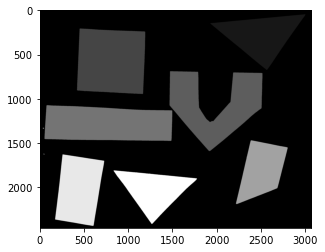

In [5]:
# Affichage des résultats 

plt.imshow(etiquette_image, cmap = 'gray')

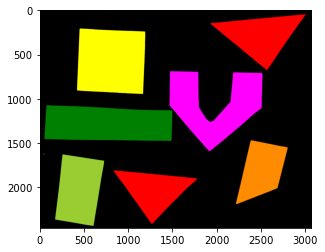

In [6]:
# coloration de chaque composant connecté 

colored_label_image = label2rgb(etiquette_image, bg_label = 0)

plt.imshow(colored_label_image)

# 3 - Application des opérations morphométriques

- La librairie skimage fournit la fonction skimage.measure.regionsprops pour mesurer les propriétés des régions_étiquetées 


- Cette fonction renvoie une liste de propriétes qui décrivent chaque objet dans l'image 


- Parmi ces propriétés nous avons : 

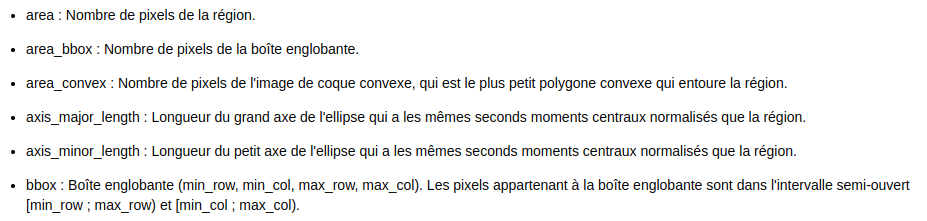

La liste complète des propriétes peut être consulté sur le lien : 


- https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops

In [7]:
# Obtention des régions sous forme d'objets python

regions = regionprops(etiquette_image)

regions

In [8]:
# Extraction du nombre de pixels contenus dans chaque pixels

regions_area = []

for i in regions : 
    
    pixel = i['area']
    
    regions_area.append(pixel)
    
print(regions_area)
    
    

[318542, 1, 523204, 496613, 517331, 143, 256215, 1, 68, 338784, 265755]


Text(0, 0.5, 'Nombre d objets')

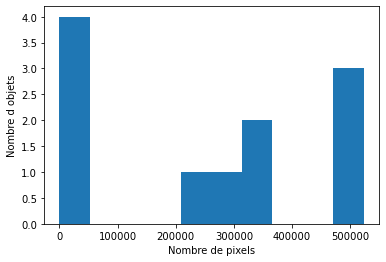

In [9]:
# Avec un histogramme, nous visualisons le nombre d'objets détectés en focntion du nombre de pixels qu'ils contiennent

fig, ax = plt.subplots()

plt.hist (regions_area)

plt.xlabel ('Nombre de pixels')

plt.ylabel ('Nombre d objets')

Dans l'image : 


- Quatre petit objets contiennent moins de 50 000 pixels 


- Il y a un groupe de quatre (1 + 1 + 2) dont la plage de pixels comprise entre 200 000 et 400 000 


- Aussi il y a 3 objets d'une surface d'environ 500 000 pixels 

- Pour une bonne segmentation, l'idéal est d'ignorer les tous petits objets (car ils conitennent très peu de pixels) et constituent le bruit


- Ces petits objets sont dûs aux erreurs de mesure comme une photo mal prise, un grand vent faisant soulever du sable lors de la prise de photo et apparaissant sur l'image


- Pour notre image, ces petits objets sans intèrêt se trouvent totalement à gauche sur l'histogramme et contiennent le plus faible nombre de pixels parmi tous les objets de l'image


- Le contenu de la liste regions_area montre que le nombre de pixels que renferme ces petits objet est inférieur à 200 


- Pour une bonne segmentation, nous pouvons fixer une surface minimale de 200 pixels pour la détection des objets

In [10]:
# Décompte des objets ayant une surface d'au moins 200 pixels

objets_min_200 = []

for i in regions_area :
    
    if i > 200 :
        
        objets_min_200.append(i)
        
print(objets_min_200)

[318542, 523204, 496613, 517331, 256215, 338784, 265755]


In [11]:
print(len (objets_min_200))

7


Retrait des petits objet de l'image etiquetée :


- La fonction remove_small_obhetcts de skimage.morphology permet de le faire. On l'applique à une image binarisée. 


- Elle renvoie un masque excluant tous les objets dont la surface pixels est inférieur à la surface pixels minimale définie


- On peut alors mettre en oeuvre l'ACC sur le masque obtenu

In [12]:
# Définissons une fonction permettant de le faire


def composants_connectes(fichier_image,sigma,t,indice_connectivity) :
    
    #chargement de l'image
    
    image = imread(fichier_image)
    
    # conversion en nuance de gris
    
    gray_image = rgb2gray(image)
    
    # elimination du bruit avec un filtre gaussien
    
    blur_image = gaussian (gray_image, sigma = sigma)
    
    # seuillage pour séparer les objets d'intèrêt de l'arrière plan
    
    binary_image = blur_image < t
    
    # mask excluant tous les petits objets
    
    masque_image = remove_small_objects (binary_image,200)
    
    # mise en oeuvre de l'acc
    
    etiquette_image,nbre_regions = label(masque_image, connectivity = indice_connectivity, return_num = True)
    
    return etiquette_image,nbre_regions

In [13]:
# Exécution de l'analyse des comoposants connectés

etiquette_image, nbre_region = composants_connectes(fichier_image = 'image.jpg', sigma = 2 , t = 0.9 , indice_connectivity = 2)

In [14]:
print ('le nbre d objet détectés est : ' , nbre_region )

le nbre d objet détectés est :  7


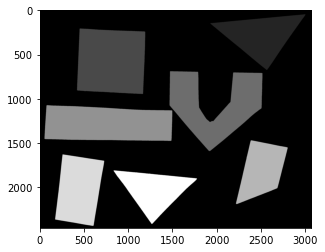

In [15]:
# Affichage des résultats 

plt.imshow(etiquette_image, cmap = 'gray')

# Retraits des objets de l'image

In [17]:
# obtention des régions de l'image segmentée

regions = regionprops(etiquette_image)

In [19]:
# affichons les régions et leyr indice

for num, x in enumerate (regions) :
    
    print((num,x))

(0, <skimage.measure._regionprops.RegionProperties object at 0x0000013EBA3C4970>)
(1, <skimage.measure._regionprops.RegionProperties object at 0x0000013EBAE6B640>)
(2, <skimage.measure._regionprops.RegionProperties object at 0x0000013EBAE6B6A0>)
(3, <skimage.measure._regionprops.RegionProperties object at 0x0000013EBAF5B460>)
(4, <skimage.measure._regionprops.RegionProperties object at 0x0000013EBAF5B6D0>)
(5, <skimage.measure._regionprops.RegionProperties object at 0x0000013EBAF5B6A0>)
(6, <skimage.measure._regionprops.RegionProperties object at 0x0000013EBAF5B700>)


In [20]:
# Isolation du premier objet

# coordonnées de sa boîte englobante (bounding box)

bbox1 = regions[1].bbox

bbox1 

(208, 417, 947, 1187)

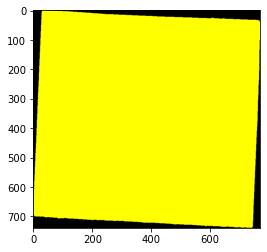

In [22]:
objet1 = colored_label_image[bbox1[0]:bbox1[2], bbox1[1]:bbox1[3]]

plt.imshow(objet1)

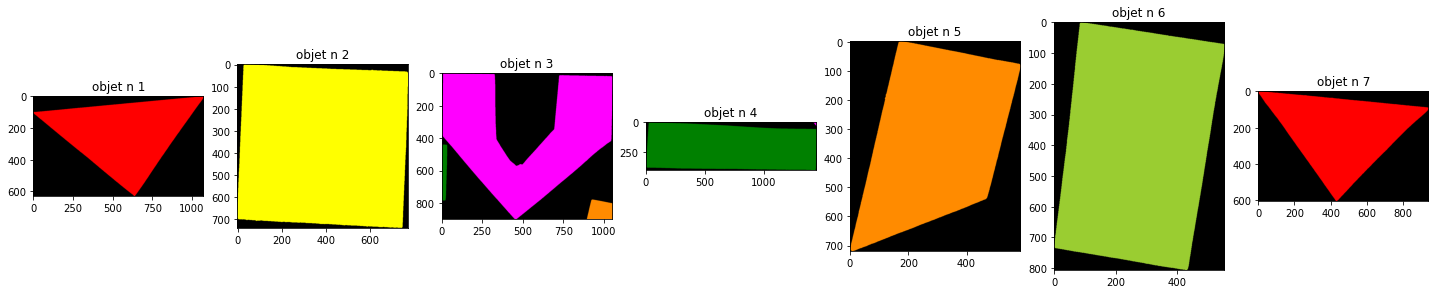

In [43]:

fig, axis = plt.subplots(1,7,figsize = (25,10))

for  i, ax in enumerate (axis.flatten()) :
    
    bbox = regions[i].bbox
    
    objet = colored_label_image[bbox[0]:bbox[2], bbox[1]:bbox[3]]

    ax.imshow(objet)
    
    ax.set_title(f"objet n {i + 1}") 

